In [1]:
import pandas as pd

#import data
file_name = "bankrupt_data.csv"

In [2]:
df = pd.read_csv(filepath_or_buffer = file_name, encoding = 'latin-1')

In [3]:
#method1 to check how many companies went bankrupt
count = df['Bankrupt?'].value_counts(sort = False)
count

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [4]:
#remove space from columns

a = df.columns.tolist()
a = [x.strip(' ') for x in a]

df.columns = a

df.columns

import numpy as np 
import matplotlib.pyplot as plt

X = df.iloc[:,1:]
y = df['Bankrupt?']

importances = X.apply(lambda x:x.corr(y))
indices = np.argsort(importances)
print(importances[indices])

names= df.columns[1:]
#set the treshold to the absolute value of 0.10
a = []

for i in range(0, len(indices)):
    if np.abs(importances[i])>0.10:     
        a.append(names[i])
        print(names[i])

print(len(a))

X = df.loc[:, a]

net income to total assets                                -0.315457
ROA(A) before interest and % after tax                    -0.282941
ROA(B) before interest and depreciation after tax         -0.273051
ROA(C) before interest and depreciation before interest   -0.260807
net worth/assets                                          -0.250161
                                                             ...   
current liabilities to current assets                      0.171306
borrowing dependency                                       0.176543
current liability to assets                                0.194494
equity to liability                                       -0.083048
debt ratio %                                               0.250161
Length: 95, dtype: float64
ROA(C) before interest and depreciation before interest
ROA(A) before interest and % after tax
ROA(B) before interest and depreciation after tax
operating gross margin
tax rate (A)
per Net Share Value (B)
Net Value Per Share 

In [5]:
from sklearn.model_selection import train_test_split

X["bankrupcy"] = y

df_train,df_test = train_test_split(X,test_size=0.25,
                                 random_state=2021,
                                 stratify=y)

In [6]:
X

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,operating gross margin,tax rate (A),per Net Share Value (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Operating Profit Per Share (Yuan),...,current liability to equity,equity to long-term liability,CFO to ASSETS,current liabilities to current assets,one if total liabilities exceeds total assets zero otherwise,net income to total assets,Gross profit to Sales,Net income to stockholder's Equity,liability to equity,bankrupcy
0,0.370594,0.424389,0.405750,0.601457,0.000000,0.147950,0.147950,0.147950,0.169141,0.095921,...,0.339077,0.126549,0.520382,0.118250,0,0.716845,0.601453,0.827890,0.290202,1
1,0.464291,0.538214,0.516730,0.610235,0.000000,0.182251,0.182251,0.182251,0.208944,0.093722,...,0.329740,0.120916,0.567101,0.047775,0,0.795297,0.610237,0.839969,0.283846,1
2,0.426071,0.499019,0.472295,0.601450,0.000000,0.177911,0.177911,0.193713,0.180581,0.092338,...,0.334777,0.117922,0.538491,0.025346,0,0.774670,0.601449,0.836774,0.290189,1
3,0.399844,0.451265,0.457733,0.583541,0.000000,0.154187,0.154187,0.154187,0.193722,0.077762,...,0.331509,0.120760,0.604105,0.067250,0,0.739555,0.583538,0.834697,0.281721,1
4,0.465022,0.538432,0.522298,0.598783,0.000000,0.167502,0.167502,0.167502,0.212537,0.096898,...,0.330726,0.110933,0.578469,0.047725,0,0.795016,0.598782,0.839973,0.278514,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.113372,0.175045,0.175045,0.175045,0.216602,0.098200,...,0.330914,0.112622,0.587178,0.027951,0,0.799927,0.604455,0.840359,0.279606,0
6815,0.475162,0.538269,0.524172,0.598308,0.371596,0.181324,0.181324,0.181324,0.216697,0.098608,...,0.329753,0.112329,0.569498,0.031470,0,0.799748,0.598306,0.840306,0.278132,0
6816,0.472725,0.533744,0.520638,0.610444,0.490839,0.269521,0.269521,0.269521,0.210929,0.100073,...,0.326921,0.110933,0.589341,0.007542,0,0.797778,0.610441,0.840138,0.275789,0
6817,0.506264,0.559911,0.554045,0.607850,0.181294,0.213392,0.213392,0.213392,0.228326,0.111799,...,0.329294,0.110957,0.678338,0.022916,0,0.811808,0.607846,0.841084,0.277547,0


In [7]:
X=df_train.drop(columns=["bankrupcy"])
y=df_train["bankrupcy"]


In [8]:
from sklearn.linear_model import LogisticRegression

#generate a logistics regression model

log_reg = LogisticRegression(class_weight='balanced', max_iter=10000)
log_model = log_reg.fit(X, y)
log_pred = log_model.predict(X)
log_pred2 = log_model.predict(df_test.drop(columns=["bankrupcy"]))


In [9]:
log_pred

array([0, 1, 0, ..., 0, 1, 0])

In [10]:
log_pred2

array([1, 0, 0, ..., 0, 0, 0])

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y,log_pred))
print(classification_report(y,log_pred))


print(confusion_matrix(df_test["bankrupcy"],log_pred2))
print(classification_report(df_test["bankrupcy"],log_pred2))

[[4224  725]
 [  16  149]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      4949
           1       0.17      0.90      0.29       165

    accuracy                           0.86      5114
   macro avg       0.58      0.88      0.60      5114
weighted avg       0.97      0.86      0.90      5114

[[1404  246]
 [   7   48]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1650
           1       0.16      0.87      0.28        55

    accuracy                           0.85      1705
   macro avg       0.58      0.86      0.60      1705
weighted avg       0.97      0.85      0.90      1705



In [12]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

clf = CatBoostClassifier()

params = {'iterations': [500],
          'depth': [4, 5, 6],
          'loss_function': ['Logloss'],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
#           'eval_metric': ['Accuracy'],
#           'use_best_model': ['True'],
          'logging_level':['Silent'],
          'random_seed': [42],
          'scale_pos_weight': [29]
         }

          
scorer = make_scorer(accuracy_score)
clf_grid = GridSearchCV(estimator = clf, param_grid = params, scoring = 'recall', cv = 3)


clf_grid.fit(X, y)


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fc908276d90>,
             param_grid={'depth': [4, 5, 6], 'iterations': [500],
                         'l2_leaf_reg': array([1.00000000e-20, 3.16227766e-20, 1.00000000e-19]),
                         'leaf_estimation_iterations': [10],
                         'logging_level': ['Silent'],
                         'loss_function': ['Logloss'], 'random_seed': [42],
                         'scale_pos_weight': [29]},
             scoring='recall')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'borrowing dependency'),
  Text(1, 0, 'Gross profit to Sales'),
  Text(2, 0, 'ROA(C) before interest and depreciation before interest'),
  Text(3, 0, 'cash / total assets'),
  Text(4, 0, 'CFO to ASSETS'),
  Text(5, 0, 'net income to total assets'),
  Text(6, 0, 'Retained Earnings/Total assets'),
  Text(7, 0, 'operating gross margin'),
  Text(8, 0, 'net worth/assets'),
  Text(9, 0, 'working capital to total assets'),
  Text(10, 0, 'current liability to assets'),
  Text(11, 0, 'equity to long-term liability'),
  Text(12, 0, 'ROA(A) before interest and % after tax'),
  Text(13, 0, 'net profit before tax/paid-in capital'),
  Text(14, 0, 'current liabilities to current assets'),
  Text(15, 0, 'Per Share Net profit before tax (yuan)'),
  Text(16, 0, 'working capital/equity'),
  Text(17, 0, 'ROA(B) before interest and depreciation after

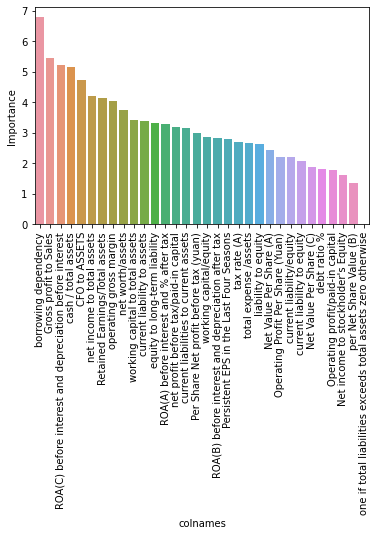

In [13]:
import seaborn as sns

importance_order = pd.DataFrame(
{"colnames":X.columns,
"Importance":clf_grid.best_estimator_.feature_importances_}
).sort_values(by="Importance",ascending=False)

sns.barplot(x=importance_order["colnames"],y=importance_order["Importance"])
plt.xticks(rotation=90)




In [14]:
x_train_new = X[importance_order.reset_index().iloc[:21,1]]
x_test_new = df_test[importance_order.reset_index().iloc[:21,1]]

In [15]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_new)
np.cumsum(pca.explained_variance_ratio_)



array([0.36535255, 0.64591924, 0.80933215, 0.87169126, 0.91131876,
       0.93432367, 0.9501215 , 0.96133961, 0.97190993, 0.97974057,
       0.98518614, 0.98986223, 0.99287969, 0.99539117, 0.99708762,
       0.99793498, 0.99857964, 0.99918598, 0.99976679, 1.        ,
       1.        ])

In [16]:
pca = PCA(n_components=7)
pca.fit(x_train_new)

PCA(n_components=7)

In [17]:

x_train_new_pca=pca.fit_transform(x_train_new)

x_test_new_pca=pca.fit_transform(x_test_new)

In [18]:
clf = CatBoostClassifier()

params = {'learning_rate':[0.02,0.03,0.04],
    'iterations': [100,200,300],
          'depth': [4, 5, 6],
          'loss_function': ['Logloss'],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
#           'eval_metric': ['Accuracy'],
#           'use_best_model': ['True'],
          'logging_level':['Silent'],
          'random_seed': [42],
          'scale_pos_weight': [29]
         }

          
scorer = make_scorer(accuracy_score)
clf_grid2 = GridSearchCV(estimator = clf, param_grid = params, scoring = 'recall', cv = 5,n_jobs=-1)

clf_grid2.fit(x_train_new_pca, y)


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fc908d38c70>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': array([1.00000000e-20, 3.16227766e-20, 1.00000000e-19]),
                         'leaf_estimation_iterations': [10],
                         'learning_rate': [0.02, 0.03, 0.04],
                         'logging_level': ['Silent'],
                         'loss_function': ['Logloss'], 'random_seed': [42],
                         'scale_pos_weight': [29]},
             scoring='recall')

In [19]:
cat1 = clf_grid2.predict(x_train_new_pca)
cat2 = clf_grid2.predict(x_test_new_pca)


In [20]:
print(confusion_matrix(y,cat1))
print(classification_report(y,cat1))


print(confusion_matrix(df_test["bankrupcy"],cat2))
print(classification_report(df_test["bankrupcy"],cat2))

[[4310  639]
 [  17  148]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      4949
           1       0.19      0.90      0.31       165

    accuracy                           0.87      5114
   macro avg       0.59      0.88      0.62      5114
weighted avg       0.97      0.87      0.91      5114

[[1408  242]
 [   8   47]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1650
           1       0.16      0.85      0.27        55

    accuracy                           0.85      1705
   macro avg       0.58      0.85      0.60      1705
weighted avg       0.97      0.85      0.90      1705

